# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

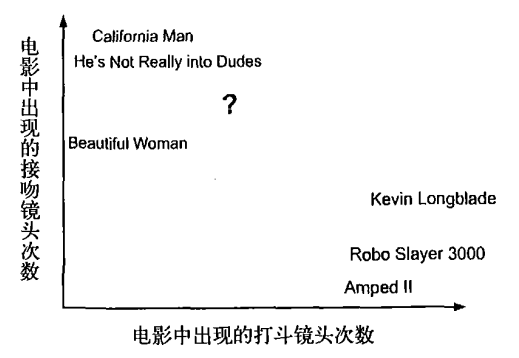

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

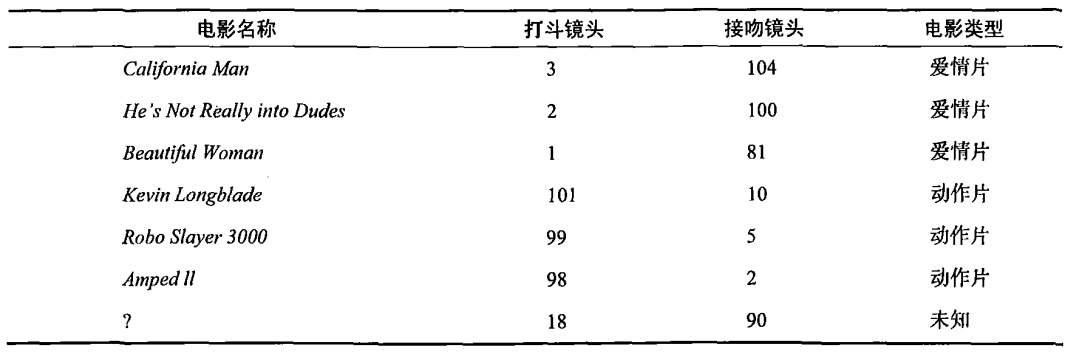

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

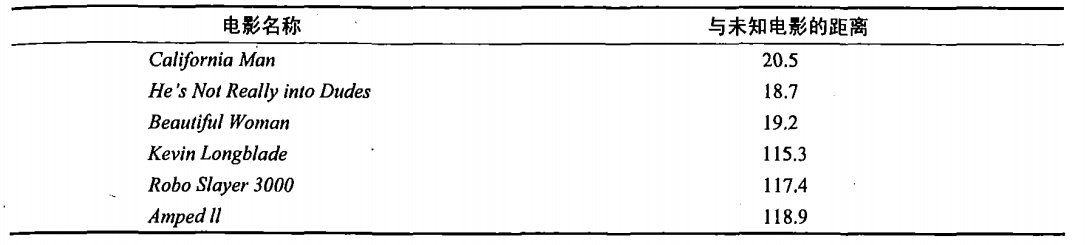

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
%matplotlib inline

In [2]:
movie = pd.read_excel('../data/tests.xlsx',sheet_name=1)
movie

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


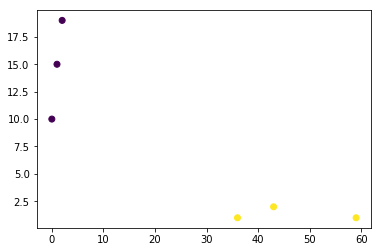

In [3]:
plt.scatter(movie['武打镜头'],movie['接吻镜头'],c=[1,1,0,1,0,0])

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier()
# 训练数据是样本,一定得是二维的.
knn.fit(movie[['武打镜头','接吻镜头']],movie['分类情况'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
X_test = np.array([[30,2],[45,3],[3,15]])
y_ = knn.predict(X_test)
y_

array(['动作片', '动作片', '爱情片'], dtype=object)

In [7]:
# 准确率 score
knn.score(X_test,['动作片', '动作片', '爱情片'])

1.0

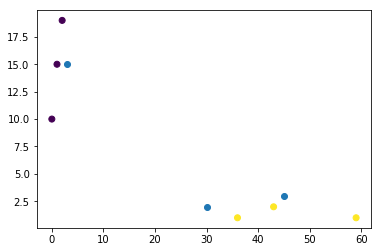

In [8]:
plt.scatter(movie['武打镜头'],movie['接吻镜头'],c=[1,1,0,1,0,0])
plt.scatter(X_test[:,0], X_test[:,1],cmap='rainbow')

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

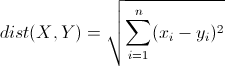

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [9]:
X_train = np.array([[180,170,43],[170,102,38],[174,120,42],[173,160,43],[165,200,42],[165,120,37],[155,90,36],[190,180,46],[160,100,38],[160,120,40]])
y_train = np.array(['男','女','男','男','男','女','女','男','女','男'])

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
X_test = np.array([[175,150,43],[170,140,42],[158,100,37],[165,80,36],[180,200,43]])
y_ = knn.predict(X_test)
y_

array(['男', '男', '女', '女', '男'], dtype='<U1')

In [12]:
knn.score(X_train,y_train)

0.8

In [13]:
knn.predict(X_train)

array(['男', '女', '女', '男', '男', '女', '女', '男', '女', '女'], dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
#获取数据
data = iris['data']
target = iris['target']

In [17]:
data.shape

(150, 4)

In [18]:
target.shape

(150,)

In [19]:
#导入拆分的工具
from sklearn.model_selection import train_test_split
#让计算机学习一部分数据，另一部分，计算机没有接触过

#让计算机预测没有接触的数据，分类，识别这些数据

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)  # 随机取

In [21]:
X_train.shape

(120, 4)

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_ = knn.predict(X_test)
y_

array([2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 2])

In [24]:
y_test

array([2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 2])

In [25]:
knn.score(X_test,y_test)

1.0

In [26]:
knn.score(X_train,y_train)

0.9583333333333334

获取训练样本

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [27]:
# 从data中选取两个特征
df = DataFrame(data=data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


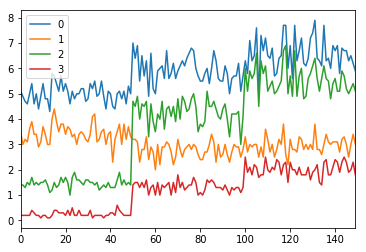

In [28]:
df.plot()

In [29]:
data = data[:,0:2]
data.shape

(150, 2)

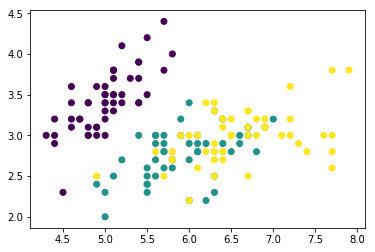

In [30]:
plt.scatter(data[:,0],data[:,1],c = target)

In [31]:
knn = KNeighborsClassifier()
knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
knn.score(data,target)

0.8333333333333334

对数据进行预测

In [33]:
# 生成平面上的点来做预测数据
xmin,xmax = data[:,0].min(),data[:,0].max()
ymin,ymax = data[:,1].min(),data[:,1].max()
x,y = np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100)

# 范围变成面
X,Y = np.meshgrid(x,y)
X_test = np.c_[X.ravel(),Y.ravel()]
X_test

array([[4.3       , 2.        ],
       [4.33636364, 2.        ],
       [4.37272727, 2.        ],
       ...,
       [7.82727273, 4.4       ],
       [7.86363636, 4.4       ],
       [7.9       , 4.4       ]])

In [34]:
X_test.shape

(10000, 2)

In [35]:
y_ = knn.predict(X_test)
y_

array([1, 1, 1, ..., 2, 2, 2])

In [36]:
len(y_)

10000

In [37]:
y_[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Wall time: 40.7 ms


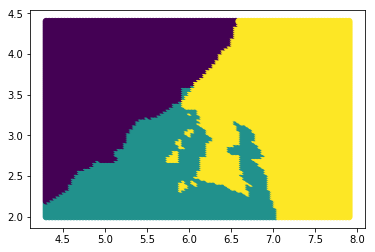

In [38]:
%time plt.scatter(X_test[:,0], X_test[:,1], c=y_)

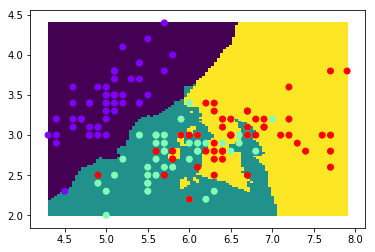

In [39]:
plt.pcolormesh(X,Y,y_.reshape((100,100)))
plt.scatter(data[:,0],data[:,1],c=target, cmap='rainbow')

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

获取数据

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [68]:
seeds = pd.read_csv('../data/seeds.tsv',sep='\t',header=None)

In [69]:
seeds.head(20)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,Kama
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,Kama


In [70]:
seeds.isnull().all()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [71]:
np.unique(seeds.loc[:,7].values)

array(['Canadian', 'Kama', 'Rosa'], dtype=object)

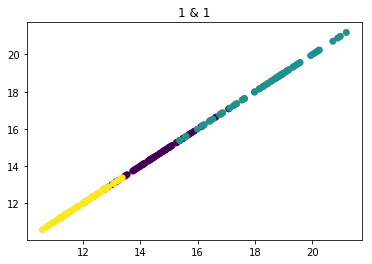

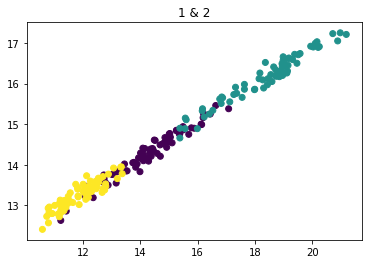

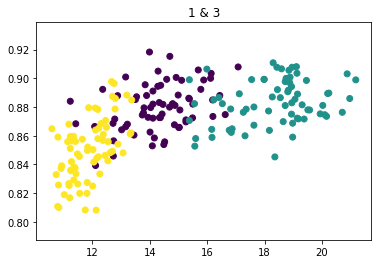

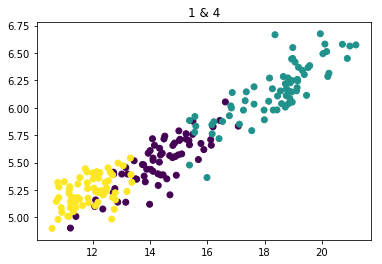

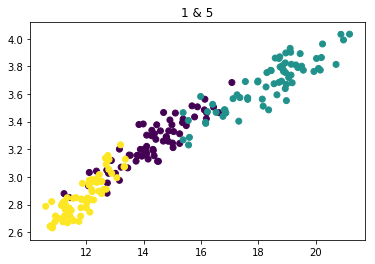

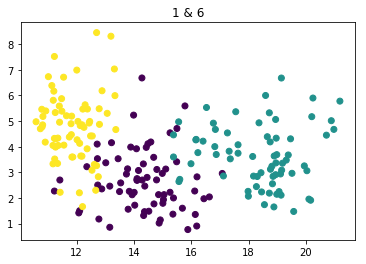

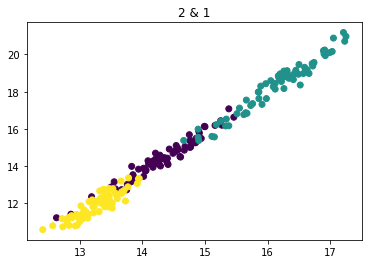

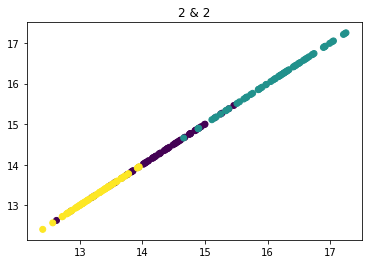

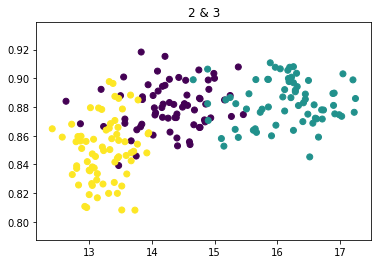

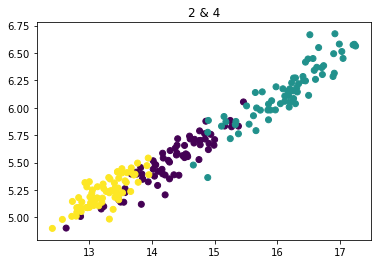

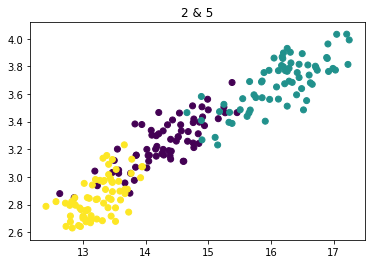

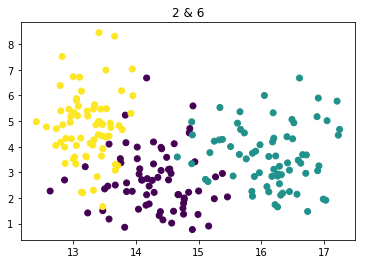

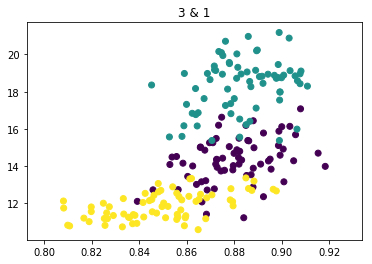

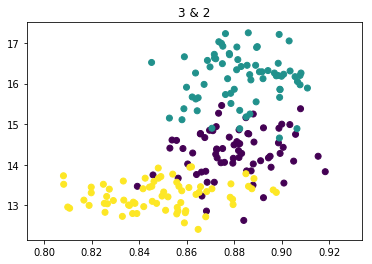

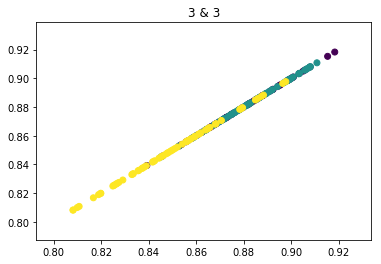

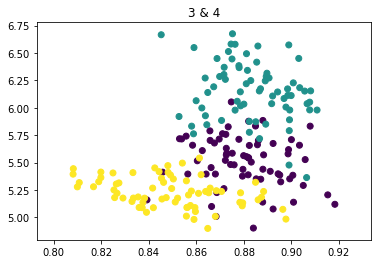

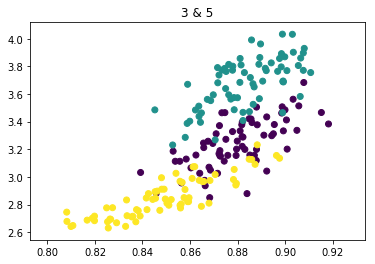

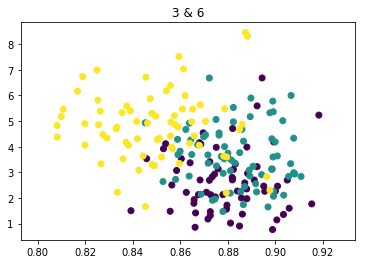

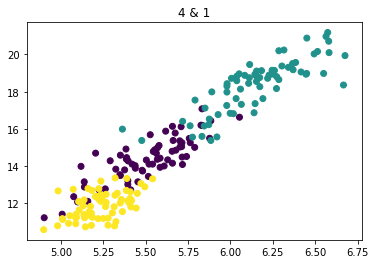

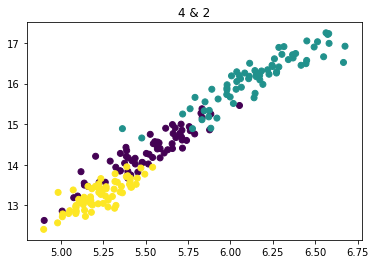

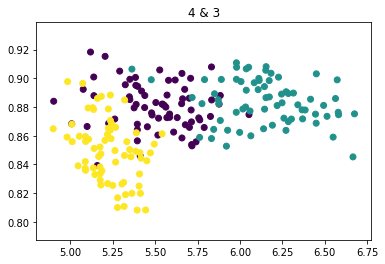

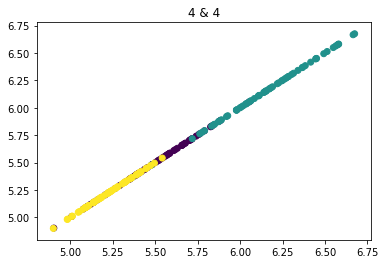

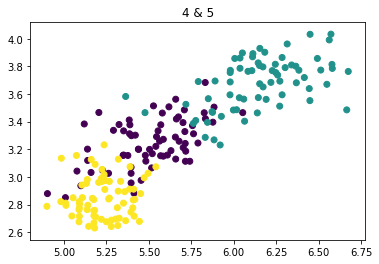

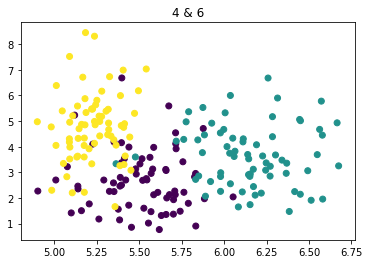

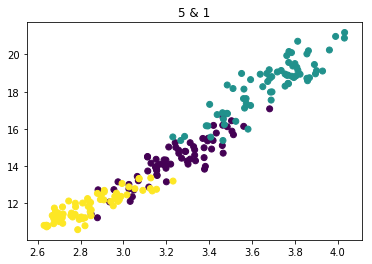

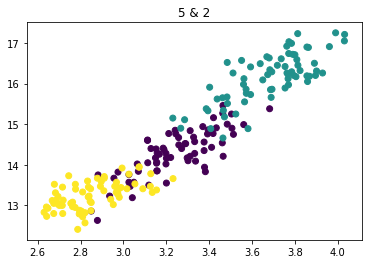

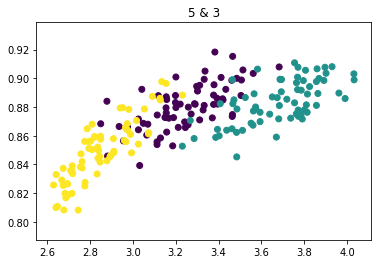

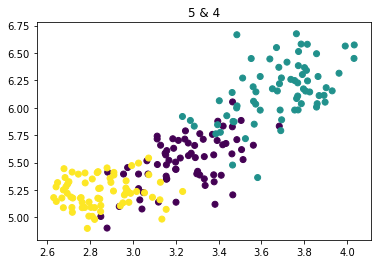

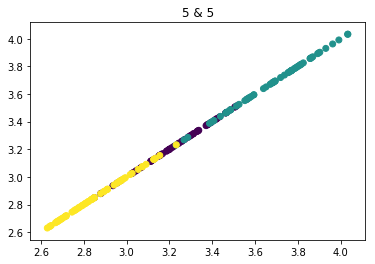

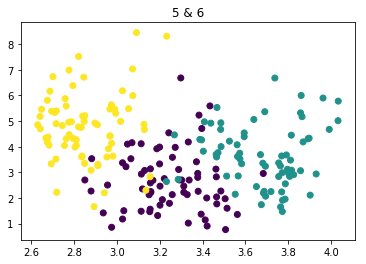

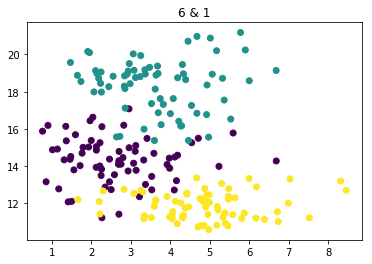

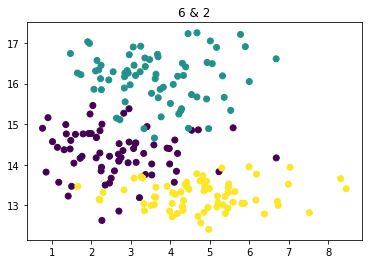

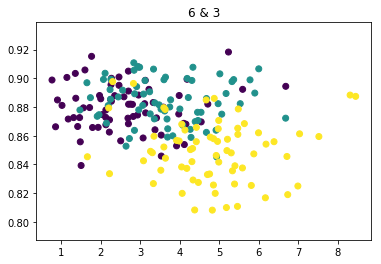

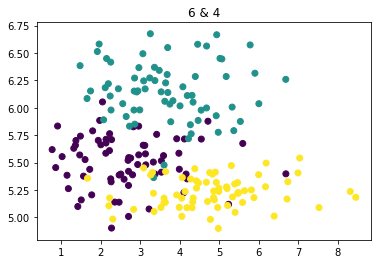

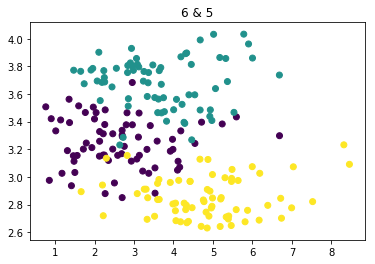

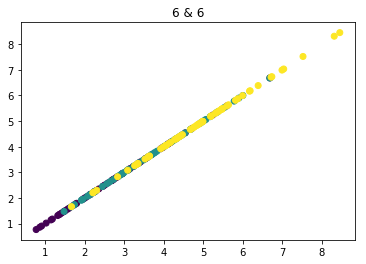

In [72]:
for i in range(1,7):
    for j in range(1,7):
        a,b = i-1,j-1
        x =seeds[a]
        y =seeds[b]
        plt.show()
        targe = []
        for k in range(seeds.shape[0]):
            if seeds.loc[k,7]=='Kama':
                targe.append(0)
            if seeds.loc[k,7]=='Rosa':
                targe.append(1)
            if seeds.loc[k,7]=='Canadian':
                targe.append(2)
        plt.scatter(x,y,c=targe)
        plt.title(f'{i} & {j}')

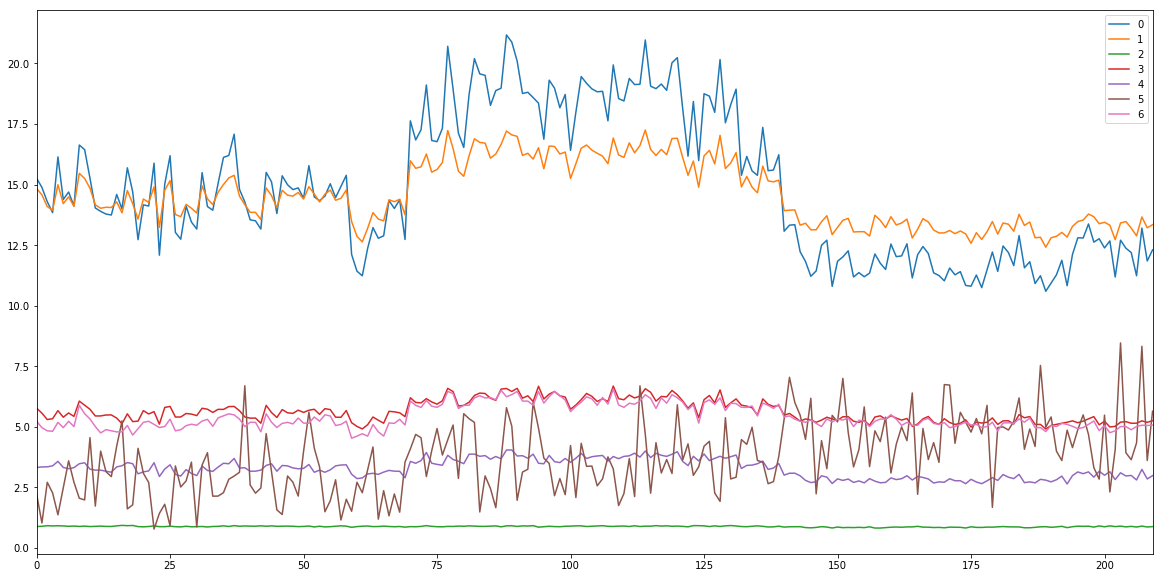

In [73]:
seeds.plot(figsize=(20,10))

In [74]:
# 将['Canadian', 'Kama', 'Rosa']替换成响应数值
# seeds.replace({'Kama':0},inplace=True)
# seeds.replace({'Rosa':1},inplace=True)
# seeds.replace({'Canadian':2},inplace=True)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# 训练数据
knn = KNeighborsClassifier()
knn.fit(seeds[[1,5]],seeds[7])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
Canadian_mean_1 = seeds[seeds.loc[:,7].values == 'Kama'][[1]].mean()
Canadian_mean_5 = seeds[seeds.loc[:,7].values == 'Kama'][[5]].mean()
display(Canadian_mean_1,Canadian_mean_5)

1    14.294286
dtype: float64

5    2.667403
dtype: float64

In [78]:
Kama_mean_1 = seeds[seeds.loc[:,7].values == 'Rosa'][[1]].mean()
Kama_mean_5 = seeds[seeds.loc[:,7].values == 'Rosa'][[5]].mean()
display(Kama_mean_1,Kama_mean_5)

1    16.135714
dtype: float64

5    3.6448
dtype: float64

In [79]:
Rosa_mean_1 = seeds[seeds.loc[:,7].values == 'Canadian'][[1]].mean()
Rosa_mean_5 = seeds[seeds.loc[:,7].values == 'Canadian'][[5]].mean()
display(Rosa_mean_1,Rosa_mean_5)

1    13.247857
dtype: float64

5    4.7884
dtype: float64

In [80]:
X_test = np.array([[14.29,2.66],[16.13,3.64],[13.24,4.78],[13.29,2.46],[15.13,3.94],[14.24,4.28],[13.79,2.36],[15.73,3.34],[13.64,4.28]])
y_ = knn.predict(X_test)
y_

array(['Kama', 'Rosa', 'Canadian', 'Canadian', 'Rosa', 'Kama', 'Kama',
       'Rosa', 'Canadian'], dtype=object)

In [81]:
knn.score(X_test,['Kama', 'Rosa', 'Canadian', 'Kama', 'Rosa', 'Canadian','Kama', 'Rosa', 'Canadian'])

0.7777777777777778

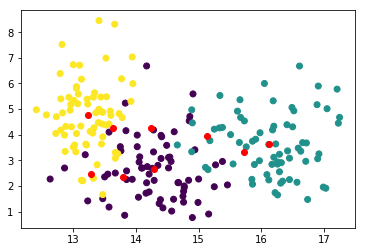

In [82]:
plt.scatter(seeds[1],seeds[5],c=targe)
plt.scatter(X_test[:,0], X_test[:,1],c='r')

In [84]:
# 生成平面上的点来做预测数据
xmin,xmax = seeds[1].min(),seeds[1].max()
ymin,ymax = seeds[5].min(),seeds[5].max()
x,y = np.linspace(xmin,xmax,1000),np.linspace(ymin,ymax,100)

# 范围变成面
X,Y = np.meshgrid(x,y)
display(X,Y)

array([[12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ],
       [12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ],
       [12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ],
       ...,
       [12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ],
       [12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ],
       [12.41      , 12.41484484, 12.41968969, ..., 17.24031031,
        17.24515516, 17.25      ]])

array([[0.7651    , 0.7651    , 0.7651    , ..., 0.7651    , 0.7651    ,
        0.7651    ],
       [0.84278586, 0.84278586, 0.84278586, ..., 0.84278586, 0.84278586,
        0.84278586],
       [0.92047172, 0.92047172, 0.92047172, ..., 0.92047172, 0.92047172,
        0.92047172],
       ...,
       [8.30062828, 8.30062828, 8.30062828, ..., 8.30062828, 8.30062828,
        8.30062828],
       [8.37831414, 8.37831414, 8.37831414, ..., 8.37831414, 8.37831414,
        8.37831414],
       [8.456     , 8.456     , 8.456     , ..., 8.456     , 8.456     ,
        8.456     ]])

In [83]:
X_test = np.c_[X.ravel(),Y.ravel()]
X_test

array([[0.00000000e+00, 0.00000000e+00],
       [9.21949495e+02, 0.00000000e+00],
       [1.84389899e+03, 0.00000000e+00],
       ...,
       [8.94291010e+04, 2.09193490e+01],
       [9.03510505e+04, 2.09193490e+01],
       [9.12730000e+04, 2.09193490e+01]])

In [56]:
y_ = knn.predict(X_test)
targe2 = []
for k in range(len(y_)):
    if y_[k]=='Kama':
        targe2.append(0)
    if y_[k]=='Rosa':
        targe2.append(1)
    if y_[k]=='Canadian':
        targe2.append(2)

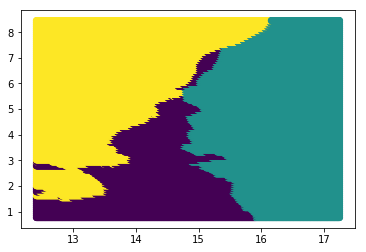

In [57]:
plt.scatter(X_test[:,0], X_test[:,1], c=targe2)

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度

In [58]:
datings = pd.read_csv('../data/datingTestSet.txt',header=None,sep='\t')
datings.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [59]:
np.unique(datings.loc[:,3].values)

array(['didntLike', 'largeDoses', 'smallDoses'], dtype=object)

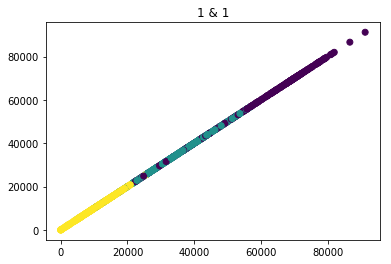

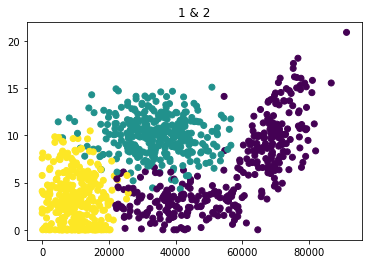

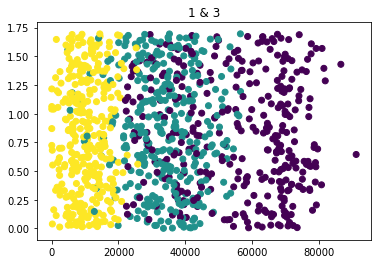

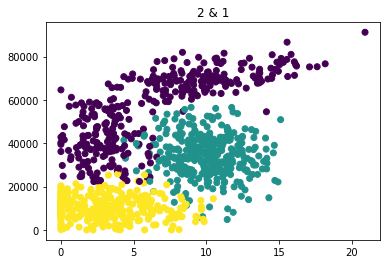

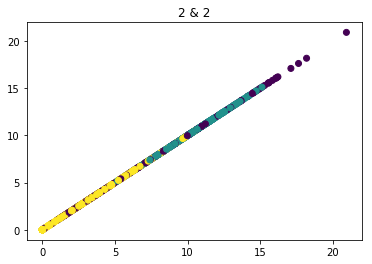

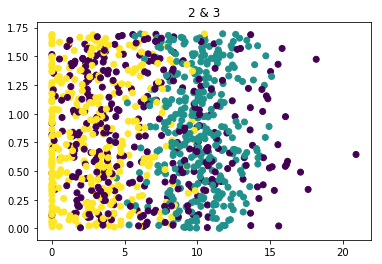

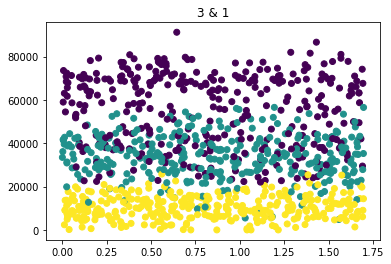

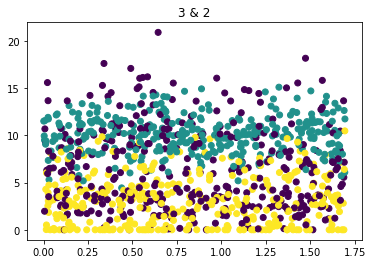

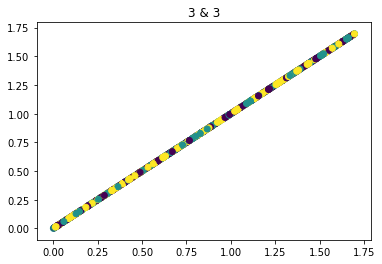

In [60]:
for i in range(1,4):
    for j in range(1,4):
        a,b = i-1,j-1
        x =datings[a]
        y =datings[b]
        plt.show()
        targe = []
        for k in range(datings.shape[0]):
            if datings.loc[k,3]=='didntLike':
                targe.append(0)
            if datings.loc[k,3]=='largeDoses':
                targe.append(1)
            if datings.loc[k,3]=='smallDoses':
                targe.append(2)
        plt.scatter(x,y,c=targe)
        plt.title(f'{i} & {j}')

In [61]:
datings.replace({'didntLike':0},inplace=True)
datings.replace({'largeDoses':1},inplace=True)
datings.replace({'smallDoses':2},inplace=True)

In [62]:
# 训练数据
knn = KNeighborsClassifier()
knn.fit(datings[[0,1]],datings[3])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
# 生成平面上的点来做预测数据
xmin,xmax = datings[0].min(),datings[0].max()
ymin,ymax = datings[1].min(),datings[1].max()
x,y = np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100)

# 范围变成面
X,Y = np.meshgrid(x,y)
X_test = np.c_[X.ravel(),Y.ravel()]
X_test

array([[0.00000000e+00, 0.00000000e+00],
       [9.21949495e+02, 0.00000000e+00],
       [1.84389899e+03, 0.00000000e+00],
       ...,
       [8.94291010e+04, 2.09193490e+01],
       [9.03510505e+04, 2.09193490e+01],
       [9.12730000e+04, 2.09193490e+01]])

In [64]:
y_ = knn.predict(X_test)
y_

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

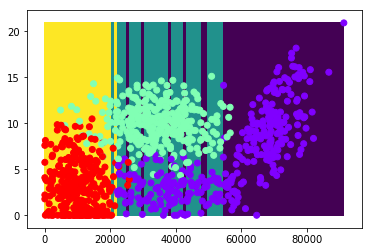

In [65]:
plt.pcolormesh(X,Y,y_.reshape((100,100)))
plt.scatter(datings[0],datings[1],c=datings[3], cmap='rainbow')